✅ First 10 rows of the dataset:

   seating_no                     arabic_name  total_degree  is_new  \
0     1001660        محمد ابو الحسن حسن مصطفى         163.5       1   
1     1001661          محمد احمد محمد ابو زيد         187.5       1   
2     1001662        محمد على محمود عبدالعزيز         168.0       1   
3     1001663        محمود سيد انور محمد حامد         212.0       1   
4     1001664      محمود عطيه محمود جابر حجاج         154.0       1   
5     1001665  مروان اشرف بدرى عبدالكريم محمد         187.5       1   
6     1001666            مروان محمد بدرى حامد         182.5       1   
7     1001667      هشام محمد احمد عبد ربه حسن         166.5       1   
8     1001668     يوسف رزق الله اسحق رزق الله         118.0       1   
9     1001669      عمرو مصطفى حسنى السيد راغب         161.0       1   

   full_mark  percentage  
0        320    51.09375  
1        320    58.59375  
2        320    52.50000  
3        320    66.25000  
4        320    48.12500  
5        320    58.5937

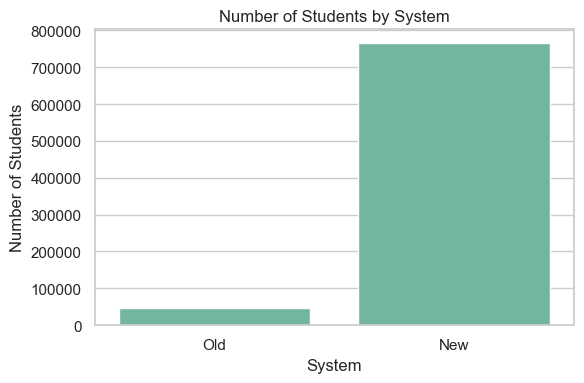

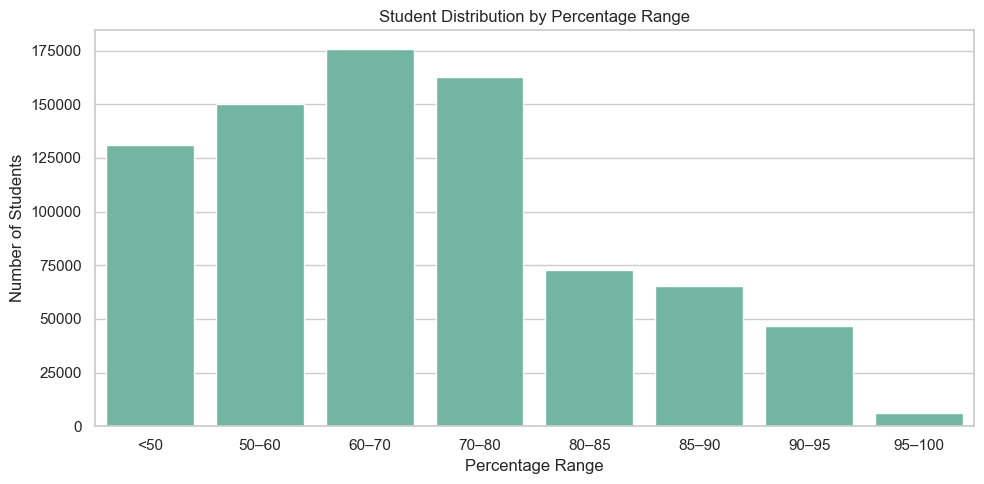

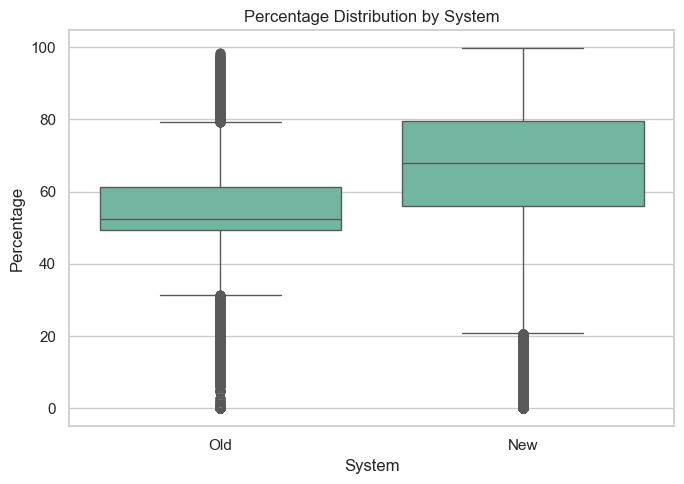

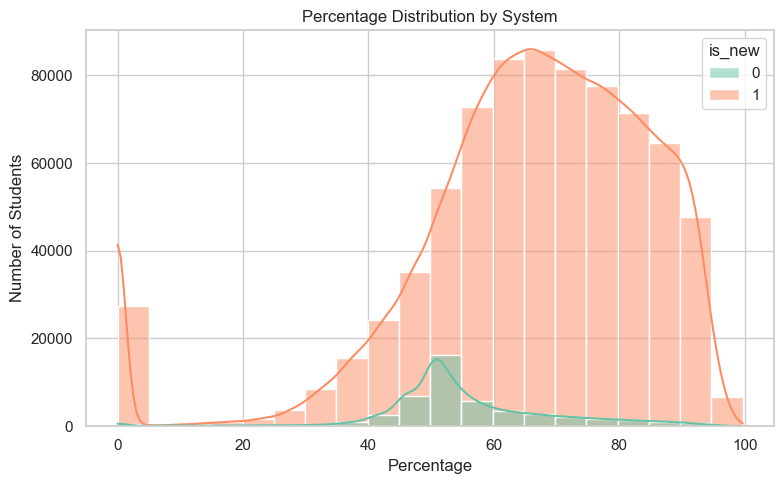

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setup plot style
sns.set(style="whitegrid", font="Arial", palette="Set2")
plt.rcParams["font.size"] = 12

# 1. Load the Excel file
df = pd.read_excel("results_with_is_new.xlsx")

# 2. Add full mark column based on system type
df["full_mark"] = df["is_new"].apply(lambda x: 320 if x == 1 else 410)

# 3. Calculate percentage
df["percentage"] = df["total_degree"] / df["full_mark"] * 100

# 4. Display first 10 rows
print("✅ First 10 rows of the dataset:\n")
print(df.head(10))

# 5. Count students in each system
new_count = df[df["is_new"] == 1].shape[0]
old_count = df[df["is_new"] == 0].shape[0]
print(f"\n👥 Number of students in new system: {new_count}")
print(f"👥 Number of students in old system: {old_count}")

# 6. Top and lowest student
top_student = df.loc[df["percentage"].idxmax()]
lowest_student = df.loc[df["percentage"].idxmin()]
print(f"\n🔝 Top student: {top_student['arabic_name']} - {top_student['percentage']:.2f}%")
print(f"🔻 Lowest student: {lowest_student['arabic_name']} - {lowest_student['percentage']:.2f}%")

# 7. Average percentages
print("\n📊 Average percentage by system:")
print(f"New system: {df[df['is_new'] == 1]['percentage'].mean():.2f}%")
print(f"Old system: {df[df['is_new'] == 0]['percentage'].mean():.2f}%")

# 8. Pass rate (percentage >= 50%)
pass_threshold = 50
num_passed = df[df["percentage"] >= pass_threshold].shape[0]
pass_rate = num_passed / df.shape[0] * 100
print(f"\n✅ Overall pass rate (≥ 50%): {pass_rate:.2f}%")

# 9. Distribution by percentage range
bins = [0, 50, 60, 70, 80, 85, 90, 95, 100]
labels = ["<50", "50–60", "60–70", "70–80", "80–85", "85–90", "90–95", "95–100"]
df["percentage_range"] = pd.cut(df["percentage"], bins=bins, labels=labels, right=False)
range_counts = df["percentage_range"].value_counts().sort_index()

print("\n📈 Students distribution by percentage range:")
for label, count in range_counts.items():
    print(f"{label}: {count} students")
print("------------------------------------------------------------------------")
# 🔟 Top 10 students - New system only
top10_new = df[df["is_new"] == 1].sort_values(by="percentage", ascending=False).head(10)
print("\n🏆 Top 10 students - New System:")
print(top10_new[["seating_no", "arabic_name", "percentage"]])

# 🔟 Top 10 students - Old system only
top10_old = df[df["is_new"] == 0].sort_values(by="percentage", ascending=False).head(10)
print("\n🏆 Top 10 students - Old System:")
print(top10_old[["seating_no", "arabic_name", "percentage"]])

# 🔟 Top 10 students overall
top10_all = df.sort_values(by="percentage", ascending=False).head(10)
print("\n🏆 Top 10 students - Overall:")
print(top10_all[["seating_no", "arabic_name", "percentage"]])

# --------------------------
# 📊 Plots
# --------------------------

# 1. Count of students by system type
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="is_new")
plt.xticks([0, 1], ["Old", "New"])
plt.title("Number of Students by System")
plt.ylabel("Number of Students")
plt.xlabel("System")
plt.tight_layout()
plt.show()

# 2. Percentage range distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="percentage_range", order=labels)
plt.title("Student Distribution by Percentage Range")
plt.xlabel("Percentage Range")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# 3. Boxplot comparison between systems
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="is_new", y="percentage")
plt.xticks([0, 1], ["Old", "New"])
plt.title("Percentage Distribution by System")
plt.xlabel("System")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

# 4. Histogram of percentage with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="percentage", hue="is_new", bins=20, kde=True)
plt.title("Percentage Distribution by System")
plt.xlabel("Percentage")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()
